# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

<ipython-input-1-4c9555a4fd44>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# **Load Dataset**

In [ ]:
df_master = pd.read_csv('https://raw.githubusercontent.com/Ishaq101/Tweet-Sentiment-Analysis/main/tweet.csv')

In [ ]:
df = df_master.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


In [ ]:
df

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [ ]:
df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

# **Exploratory Data Analysis**

## **Label Distribution**

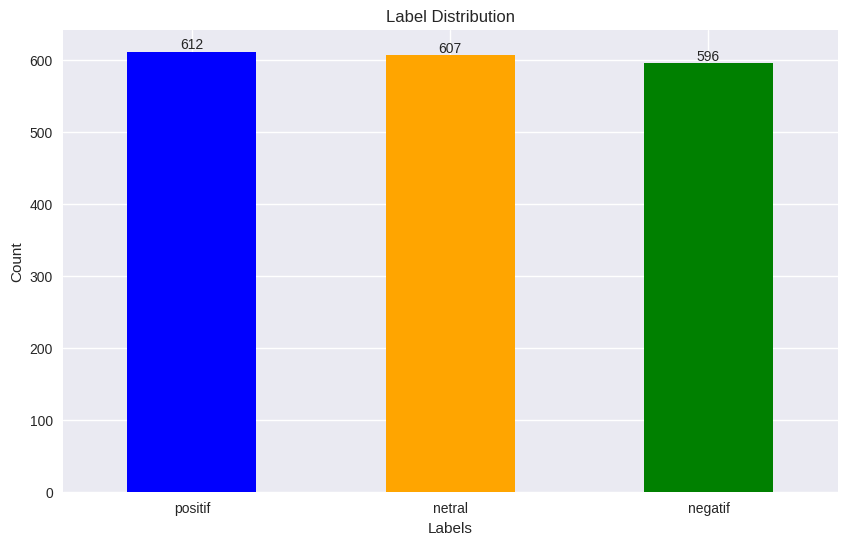

In [ ]:
# Count the occurrences of each label
label_counts = df['sentimen'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x labels horizontal
for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## **Number of Character**

<Axes: >

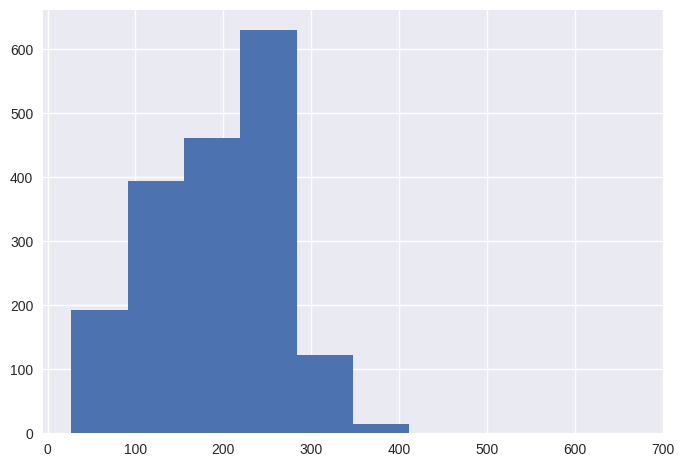

In [ ]:
df['tweet'].str.len().hist()

The histogram shows that news headlines range from 10 to 400 characters and generally, mostly between 100 to 250 characters.

## **Number of Word**

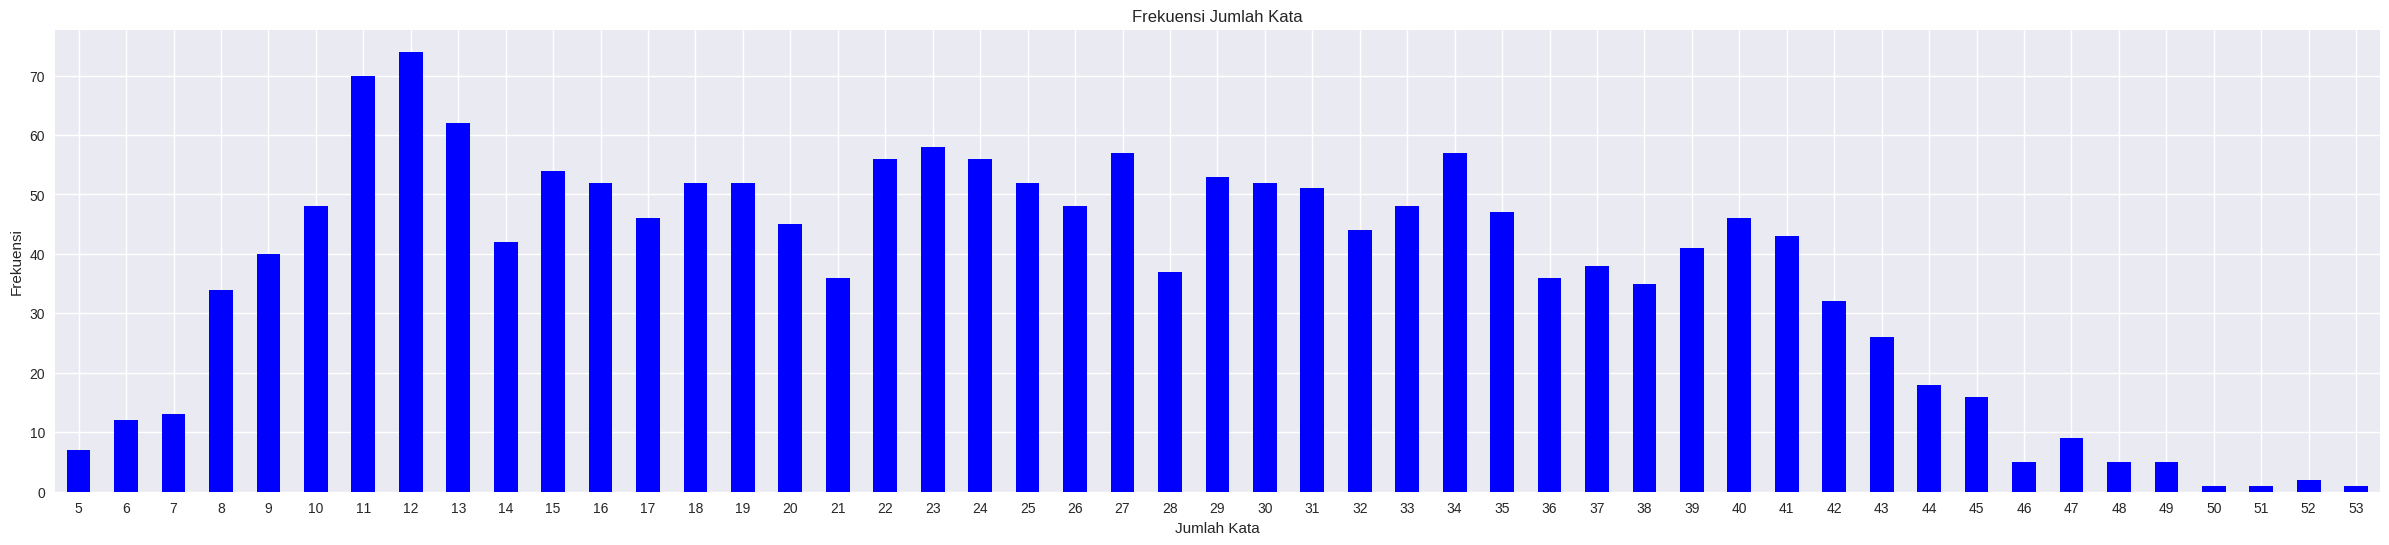

In [ ]:
df['jumlah_kata'] = df['tweet'].apply(lambda x: len(x.split()))
frekuensi_jumlah_kata = df['jumlah_kata'].value_counts().sort_index()

# Membuat bar chart untuk frekuensi jumlah kata
plt.figure(figsize=(30, 6))
frekuensi_jumlah_kata.plot(kind='bar', color='blue')
plt.title('Frekuensi Jumlah Kata')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)  # Menjaga label sumbu x tetap horizontal
plt.show()

Number of words of tweet have 5-53 range of words

## **Stopword**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('indonesian'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


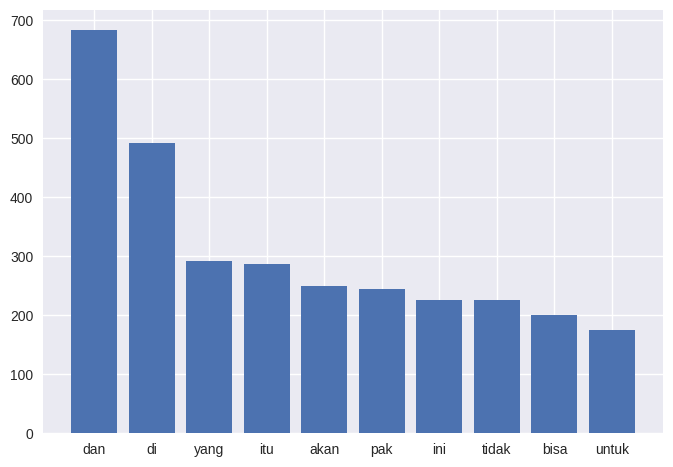

In [ ]:
plot_top_stopwords_barchart(df['tweet'])

## **Wordcloud**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


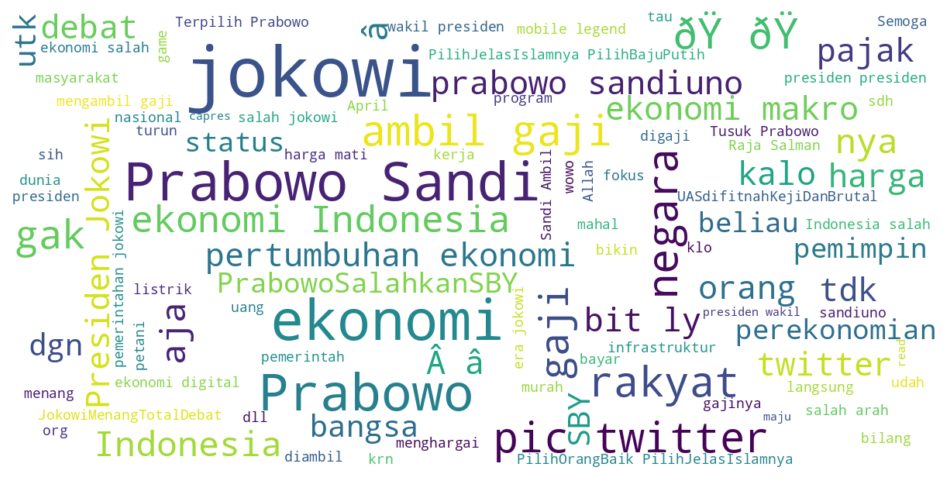

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    # Download necessary NLTK data
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

    stop = set(stopwords.words('indonesian'))

    def _preprocess_text(text):
        corpus = []
        stem = PorterStemmer()
        lem = WordNetLemmatizer()
        for news in text:
            words = [w for w in word_tokenize(news) if (w.lower() not in stop)]
            words = [lem.lemmatize(w) for w in words if len(w) > 2]
            corpus.append(' '.join(words))
        return corpus

    corpus = _preprocess_text(text)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(' '.join(corpus))

    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(df['tweet'])


## **Negation Word**

Counter({'tidak': 281, 'tak': 181, 'gak': 178, 'bukan': 156, 'tdk': 103, 'jangan': 55, 'nggak': 35, 'belum': 32, 'gk': 31, 'tanpa': 30, 'jgn': 24, 'bukanlah': 6, 'jngn': 1})


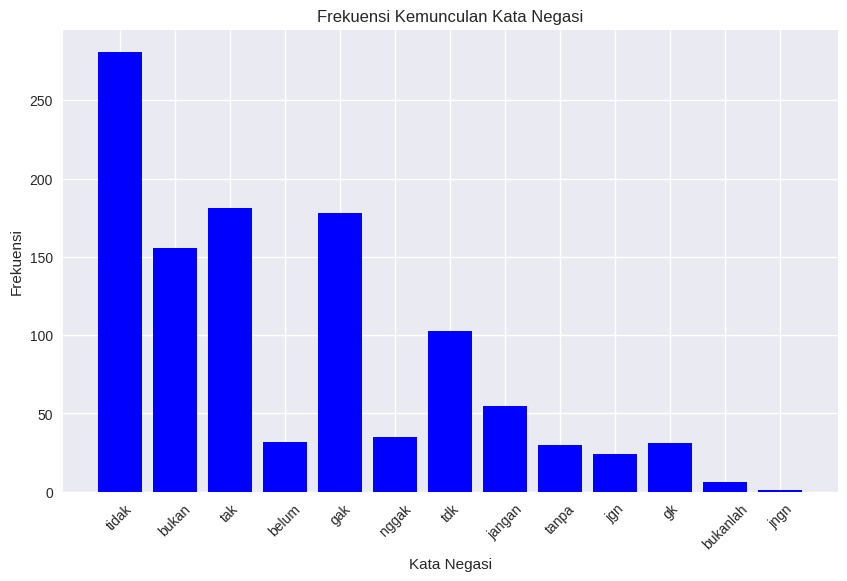

In [ ]:
import re
from collections import Counter


negasi = [
    'tidak', 'tak', 'bukan', 'jangan', 'belum', 'tanpa', 'tiada', 'jngn', 'jgn',
    'tak pernah', 'tidak pernah', 'belum pernah', 'tiada pernah',
    'bukan tidak', 'tidak ada', 'tak ada', 'tiadalah', 'bukanlah', 'tdk', 'gak', 'gk', 'nggak'
]


# Fungsi untuk menghitung kemunculan setiap kata negasi dalam teks
def count_negations(text, negasi):
    words = re.findall(r'\b\w+\b', text.lower())  # Membagi teks menjadi kata-kata
    return [word for word in words if word in negasi]

# Menghitung frekuensi kemunculan setiap kata negasi
all_negations = []
df['tweet'].apply(lambda x: all_negations.extend(count_negations(x, negasi)))

negation_counts = Counter(all_negations)

# Menampilkan frekuensi kemunculan kata negasi
print(negation_counts)

# Membuat bar chart untuk frekuensi kemunculan kata negasi
plt.figure(figsize=(10, 6))
plt.bar(negation_counts.keys(), negation_counts.values(), color='blue')
plt.title('Frekuensi Kemunculan Kata Negasi')
plt.xlabel('Kata Negasi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

## **Punctuation**

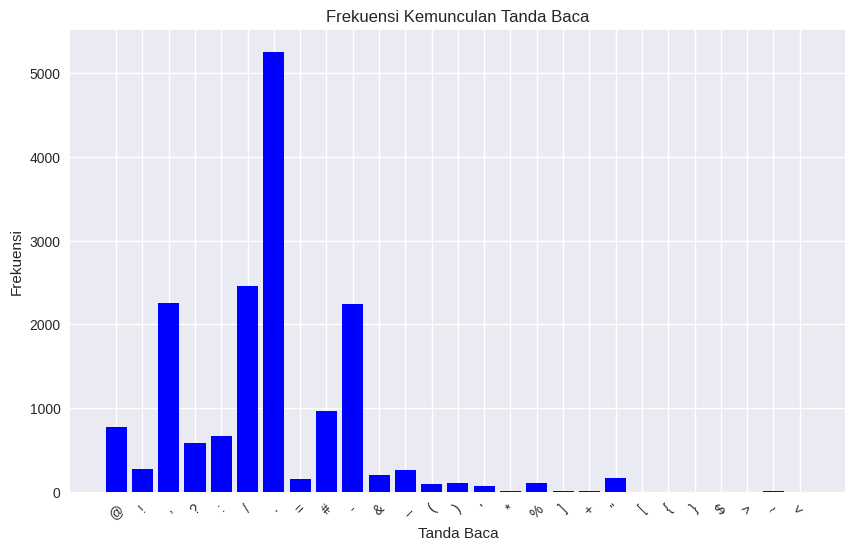

In [ ]:
import string

# Fungsi untuk menghitung kemunculan tanda baca dalam teks
def count_punctuation(text):
    # Mendapatkan setiap karakter tanda baca dari string.punctuation
    punctuations = set(string.punctuation)
    # Menghitung jumlah kemunculan setiap karakter tanda baca dalam teks
    return Counter(char for char in text if char in punctuations)

# Menghitung frekuensi kemunculan tanda baca dalam setiap teks
df['frekuensi_tanda_baca'] = df['tweet'].apply(count_punctuation)

# Menyatukan hasil dari semua tanda baca
all_punctuation_counts = Counter()
for count in df['frekuensi_tanda_baca']:
    all_punctuation_counts.update(count)

# Membuat bar chart untuk frekuensi kemunculan tanda baca
plt.figure(figsize=(10, 6))
plt.bar(all_punctuation_counts.keys(), all_punctuation_counts.values(), color='blue')
plt.title('Frekuensi Kemunculan Tanda Baca')
plt.xlabel('Tanda Baca')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()

## **URL**

In [ ]:
# Pola regex untuk mendeteksi URL (sederhana)
url_pattern = r'https?://\S+'

# Fungsi untuk mengekstraksi URL dari teks
def extract_urls(text):
    return re.findall(url_pattern, text)

# Fungsi untuk mengekstraksi semua URL dari teks dalam dataframe
def extract_all_urls(df, url_pattern):
    all_urls = []
    for text in df['tweet']:
        urls = re.findall(url_pattern, text)
        all_urls.extend(urls)
    return all_urls

# Ekstraksi semua URL dari dataframe
all_urls = extract_all_urls(df, url_pattern)

# Menampilkan daftar semua URL yang ditemukan
print("Daftar URL yang muncul:")
for url in all_urls:
    print(url)

Daftar URL yang muncul:
https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â
http://dlvr.it/R2pvZVÂ
https://www.goaceh.co/artikel/serbaserbi/2019/04/14/prabowosandi-sepakat-tak-ambil-gaji-karena-negara-sedang-susah/?utm_source=dlvr.it&utm_medium=twitterÂ
https://bit.ly/2OgymxtÂ
https://twitter.com/tag_nusantara/status/1061792783114022912/photo/1
https://twitter.com/sandiuno/status/1117101696696455173Â
https://m.detik.com/news/berita/d-4509616/jika-terpilih-prabowo-sandiaga-janji-tak-ambil-gaji?utm_content=detikcom&utm_term=echobox&utm_medium=oa&utm_campaign=detikcomsocmed&utm_source=Twitter#Echobox=1555171378Â
https://www.merdeka.com/uang/harapan-dan-prediksi-ekonomi-di-tangan-jokowi-maruf-amin.htmlÂ
https://kumparan.com/beritajatim/kein-ada-18-keberhasilan-ekonomi-di-era-jokowi-1546401151770458328Â
https://twitter.com/AkunTofa/status/1117528741809229824Â
https://twitter.com/tag_nusantara/status/1061795598209232896/photo/1
https://apahabar.com/2019/04/presiden-jokowi-dan

## **Number**

In [ ]:
# Fungsi untuk mencari angka dalam teks menggunakan regex
def find_numbers(text):
    return re.findall(r'\d+', text)

# Menerapkan fungsi find_numbers ke setiap entri dalam kolom 'teks'
df['angka'] = df['tweet'].apply(find_numbers)

# Menggabungkan semua angka menjadi satu list
all_numbers = []
for num_list in df['angka']:
    all_numbers.extend(num_list)

# Menghitung frekuensi kemunculan setiap angka
number_counts = Counter(all_numbers)

# Membuat dataframe dari Counter
df_frequencies = pd.DataFrame(list(number_counts.items()), columns=['Angka', 'Frekuensi'])

# Mengurutkan dataframe berdasarkan kolom 'Angka' secara ascending (terkecil ke terbesar)
df_frequencies = df_frequencies.sort_values(by='Frekuensi', ascending=False)

# Menampilkan semua nilai dalam dataframe setelah diurutkan
print("Dataframe Frekuensi Kemunculan Angka (diurutkan):")
print(df_frequencies.to_string(index=False))

Dataframe Frekuensi Kemunculan Angka (diurutkan):
              Angka  Frekuensi
                  2        496
               2019        202
                  5        137
                  1        122
                 02        120
                  4         93
                  7         67
                  8         62
                 17         62
                 01         62
                 04         54
                  6         53
                  3         50
                  9         44
                  0         36
                 14         31
                 20         25
                 13         21
               2018         20
                 10         17
                 50         15
                 16         13
                100         12
               2014         11
                 18         10
                 09          9
                 24          9
                 71          8
               1945          8
                 15 

## **Email**

In [ ]:
# Define a function to find emails using regex
def find_emails(text):
 # Regex pattern for basic email validation
 pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\. [A-Z|a-z] {2,}\b'
 emails_found = re.findall(pattern, text)
 return emails_found

# Apply the function to check for emails in each row of the 'text' column
df['emails_found'] = df['tweet'].apply(find_emails)
df['emails_found'].value_counts()

emails_found
[]    1815
Name: count, dtype: int64

## **Hashtag**

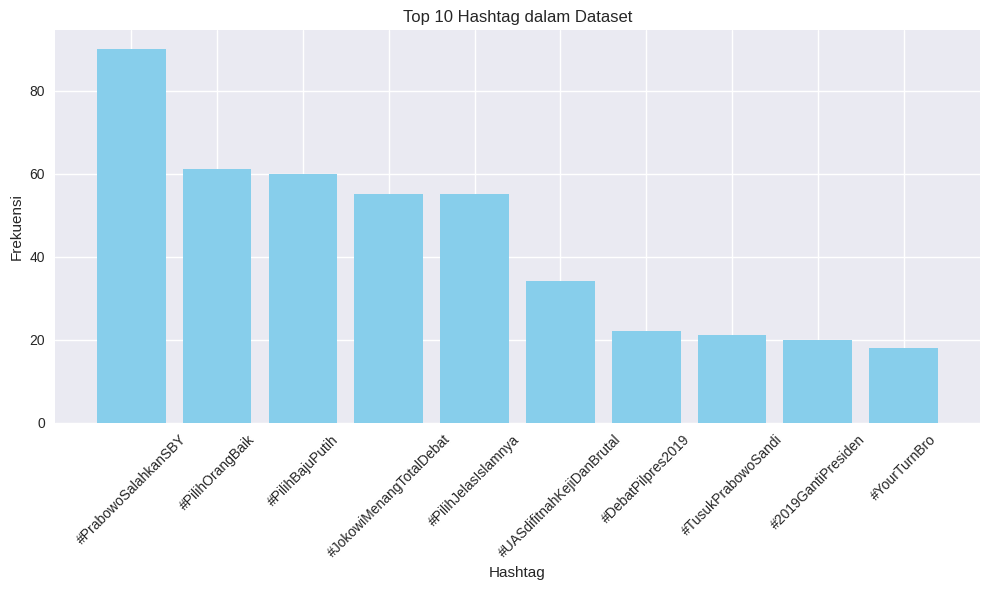

In [ ]:
# Mengekstrak hashtag dari caption
captions = df['tweet']
pattern = r'#\w+'
hashtags = []
for caption in captions:
    hashtags.extend(re.findall(pattern, caption))

# Menghitung frekuensi setiap hashtag
tag_counts = Counter(hashtags)

# Mengambil 10 hashtag teratas
top_tags = tag_counts.most_common(10)

# Memisahkan hashtag dan frekuensinya
tags, counts = zip(*top_tags)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(tags, counts, color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frekuensi')
plt.title('Top 10 Hashtag dalam Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas emoji matplotlib

In [ ]:
import pandas as pd
from collections import Counter
import emoji
import matplotlib.pyplot as plt

In [ ]:
def extract_emojis(text):
    # Use the emoji library to find all emojis in the text
    return [c for c in text if c in emoji.EMOJI_DATA]

def convert_and_plot_emoticons(text_series):
    # Extract emoticons from each text entry in the series
    emoticons_list = text_series.apply(extract_emojis)

    # Flatten the list of lists into a single list of emoticons
    all_emoticons = [emoticon for sublist in emoticons_list for emoticon in sublist]

    # Count the frequency of each emoticon
    emoticon_counts = Counter(all_emoticons)

    # Get the top 10 most common emoticons
    most_common_emoticons = emoticon_counts.most_common(10)

    # Separate the emoticons and their counts for plotting
    if most_common_emoticons:
        emoticons, counts = zip(*most_common_emoticons)

        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(emoticons, counts, color='blue')
        plt.xlabel('Emoticons')
        plt.ylabel('Counts')
        plt.title('Top 10 Emoticons in Tweets')
        plt.show()
    else:
        print("No emoticons found in the text.")


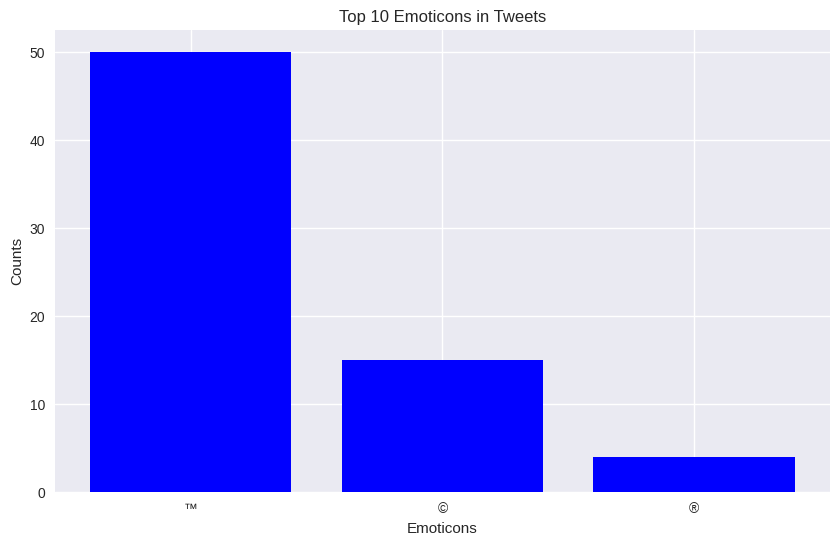

In [ ]:
df['tweet'] = df['tweet'].astype(str)
convert_and_plot_emoticons(df['tweet'])

# **Data preprocessing**


In [ ]:
df

,Unnamed: 0,sentimen,tweet,jumlah_kata,frekuensi_tanda_baca,angka,emails_found
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,19,"{'@': 2, '!': 1, ',': 1, '?': 2, ':': 1, '/': ...","[1117575436337160192, 21]",[]
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",11,"{',': 1, '?': 1, ':': 1, '/': 3, '.': 1}",[2],[]
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",11,"{',': 1, '.': 3, '#': 3, '/': 1}","[01, 2]",[]
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",17,"{',': 3, '.': 1, '!': 1}","[18, 5]",[]
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,34,"{',': 3, '.': 1}",[],[]
...,...,...,...,...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,12,{'#': 1},[2019],[]
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,11,"{'.': 3, '#': 1}","[1, 2]",[]
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,14,"{'.': 2, '!': 1, ':': 1, '/': 5}",[1111643312241295363],[]
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,10,"{',': 1, '!': 1, ':': 1, '/': 5, '.': 1}",[1113655944955588610],[]


In [ ]:
import re

In [ ]:
df = df[['sentimen', 'tweet', 'jumlah_kata','frekuensi_tanda_baca', 'angka', 'emails_found']]

In [ ]:
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}

# Ensure the 'sentimen' column is in string format, strip spaces and convert to lowercase
df['sentimen'] = df['sentimen'].astype(str).str.strip().str.lower()

# Map the values
df['sentimen_mapped'] = df['sentimen'].map(label_mapping)

<ipython-input-133-053784cb47a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['sentimen'].astype(str).str.strip().str.lower()


In [ ]:
df.groupby(['sentimen','sentimen_mapped']).count()

,,tweet,jumlah_kata,frekuensi_tanda_baca,angka,emails_found
sentimen,sentimen_mapped,,,,,
negatif,0,596,596,596,596,596
netral,1,607,607,607,607,607
positif,2,612,612,612,612,612


### Text Cleaning

#### Remove Emoji's

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# emojis = pd.read_csv('/content/drive/MyDrive/emojis (1).csv')
# emojis = list(emojis['emoji'])
# suff_emojis = list(set(map(lambda x:x[0],emojis)))

emojis = pd.read_csv('https://raw.githubusercontent.com/iorch/jakaton_feminicidios/master/data/emojis.csv')
emojis = list(emojis['emoji'])
suff_emojis = list(set(map(lambda x:x[0],emojis)))

def remove_emoji(text):
  pattern = []
  for suff in suff_emojis:
    pattern.append(f'{suff}[\w\s]*')
  pattern = '|'.join(pattern)
  compile_pattern = re.compile(pattern)
  text = compile_pattern.sub(' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  res = re.sub(r'\s{2,}', ' ', text)
  return res

# df['tweet'] = df['tweet'].apply(remove_emoji)

#### Remove regex related

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

def remove_mentions(text):
    mention_pattern = re.compile(r'@[\W]*')
    return mention_pattern.sub(r' ',text)

def remove_hashtags(text):
    return text.replace(r'#', '')

def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    return ''.join(' ' if char in punctuations else char for char in text)

In [ ]:
# df['tweet'] = df['tweet'].apply(remove_urls)

In [ ]:
# df['tweet'] = df['tweet'].apply(remove_mentions)

In [ ]:
# df['tweet'] = df['tweet'].apply(remove_hashtags)

In [ ]:
# df['tweet'] = df['tweet'].apply(remove_punctuation)

#### Remove Number

In [ ]:
# Menghapus angka dari kolom 'tweet'
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# df['tweet'] = df['tweet'].apply(remove_numbers)

#### Case folding and trim white spaces

In [ ]:
def normalize_whitespace(text):
    return ' '.join(text.split())

def case_folding(text):
    return text.lower()

In [ ]:
# df['tweet'] = df['tweet'].apply(normalize_whitespace)

In [ ]:
# df['tweet'] = df['tweet'].apply(case_folding)

### Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
import requests
import random

nltk.download('stopwords')
nltk.download('punkt')

# URLs for stopwords
STOPWORDS_URLS = [
    "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt",
    "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt",
    "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
]

# Custom stopwords
CUSTOM_STOPWORDS = ['yang', 'untuk', 'pada', 'ke', 'dari', 'dan', 'dengan', 'oleh', 'bagi',
                    'serta', 'atau', 'tapi', 'karena', 'jadi', 'walaupun', 'meskipun', 'sehingga',
                    'agar', 'supaya', 'guna', 'demi', 'sebab', 'akibat', 'melainkan', 'sebaliknya',
                    'selain', 'kecuali', 'apalagi', 'asal', 'bila', 'kalau', 'jika', 'sementara', 'sewaktu',
                    'setelah', 'sebelum', 'lalu', 'kemudian', 'kini', 'sekarang', 'nanti', 'kembali', 'lagi',
                    'hanya', 'saja', 'pun', 'juga', 'malah', 'memang', 'tentu', 'sungguh', 'amat', 'sekali', 'apatah',
                    'mengapa', 'ialah', 'yaitu', 'yakni', 'begini', 'begitu', 'apakah', 'mengapa', 'siapa', 'mengapa', 'bagaimana',
                    'kapan', 'dimana', 'berapa', 'kemana', 'daripada', 'yg', 'itu.', 'ya', 'ga', 'dari', 'ke', 'pak', 'kan', 'nya', 'dgn',
                    'pas', 'tll', 'trsa', 'bang', 'smpai', 'ama', 'bikin', 'nih', 'pdahl', 'bangettt', 'btw', 'plg', 'ntar', 'skrg', 'ttg',
                    'tu', 'emg', 'ane', 'mnrt', 'tjoy', 'abis', 'bs', 'trjadi', 'kalo', 'guys', 'ma', 'aja', 'bgt', 'gua', 'sbnrnya', 'dr', 'sm', 'banget',
                    'sy', 'haha', 'aj', 'hrs', 'sllu', 'lanjut', 'utk', 'pdhl', 'ajaa', 'tp', 'kta', 'mas', 'tnx', 'udh', 'gwa', 'lol', 'bgtu', 'hemm', 'sih', 'bnyak', 'akan', 'si']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def shuffle_stopwords(stopwords):
    random.shuffle(stopwords)
    return stopwords

def get_nltk_stopwords():
    return set(stopwords.words('indonesian'))

def fetch_stopwords(url):
    response = requests.get(url)
    return set(response.text.split('\n'))

def get_custom_stopwords(custom_stopwords):
    return set(custom_stopwords)

def construct_stopwords(urls, custom_stopwords):
    stop_words = get_nltk_stopwords()
    for url in urls:
        stop_words.update(fetch_stopwords(url))
    stop_words.update(get_custom_stopwords(custom_stopwords))
    return stop_words

In [ ]:
# Shuffle custom stopwords
shuffled_custom_stopwords = shuffle_stopwords(CUSTOM_STOPWORDS)

# Construct final stopwords set
stop_words = construct_stopwords(STOPWORDS_URLS, shuffled_custom_stopwords)

# Print to verify
print(f'Stopwords: {list(stop_words)[:5]}')

Stopwords: ['disebutkan', 'menghadapi', 'apatah', 'benar', 'kala']


In [ ]:
# remove stopwords
from nltk import word_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
# df['tweet'] = df['tweet'].apply(remove_stopword)

In [ ]:
def clean_text(text):
    case_folding(text)
    remove_emoji(text)
    remove_urls(text)
    remove_mentions(text)
    remove_hashtags(text)
    remove_numbers(text)
    remove_punctuation(text)
    normalize_whitespace(text)
    return text

### Stemming, lemmatization and tokenization

In [ ]:
!pip install Sastrawi

In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# df['tweet'] = df['tweet'].apply(stemming_and_lemmatization)

In [ ]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [ ]:
# example
text = df['tweet'].iloc[0]
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = clean_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa rockygerung œ https twitter com mediaindonesia status s

Cleaned text: 
prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa rockygerung œ https twitter com mediaindonesia status s

Removed stopword: 
prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa rockygerung œ https twitter com mediaindonesia status s

Stemmed and lemmatized: 
prabowo indonesia harga bangsa asing berita hoax buat kuasa rockygerung https twitter com mediaindonesia status s

Tokenized: 
['prabowo', 'indonesia', 'harga', 'bangsa', 'asing', 'berita', 'hoax', 'buat', 'kuasa', 'rockygerung', 'https', 'twitter', 'com', 'mediaindonesia', 'status', 's']


In [ ]:
# pipeline preprocess
def preprocess(text):
    output = clean_text(text)
    output = remove_stopword(output)
    output = stemming_and_lemmatization(output)
    output = tokenize(output)
    return output

In [ ]:
text = df['tweet'].iloc[0]
preprocess(text)

['prabowo',
 'indonesia',
 'harga',
 'bangsa',
 'asing',
 'berita',
 'hoax',
 'buat',
 'kuasa',
 'rockygerung',
 'https',
 'twitter',
 'com',
 'mediaindonesia',
 'status',
 's']

In [ ]:
# implement preprocessing (text ---> token)
df_s = df.copy()
# df.drop(columns=['sentimen'], inplace=True)
df_s['tweet_token'] = df['tweet'].apply(preprocess) # 28 mins

In [ ]:
df_s['tweet_token'][0]

['kata',
 'prabowo',
 'indonesia',
 'harga',
 'bangsa',
 'asing',
 'berita',
 'hoax',
 'buat',
 'kuasa',
 'rockygerung',
 'https',
 'twitter',
 'com',
 'mediaindonesia',
 'status',
 '1117575436337160192',
 's',
 '21']

In [ ]:
df_s.head()

,sentimen,tweet,jumlah_kata,frekuensi_tanda_baca,angka,emails_found,sentimen_mapped,tweet_token
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,19,"{'@': 2, '!': 1, ',': 1, '?': 2, ':': 1, '/': ...","[1117575436337160192, 21]",[],0,"[kata, prabowo, indonesia, harga, bangsa, asin..."
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",11,"{',': 1, '?': 1, ':': 1, '/': 3, '.': 1}",[2],[],1,"[batu, langka, tasbih, jokowi, hadiah, habib, ..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",11,"{',': 1, '.': 3, '#': 3, '/': 1}","[01, 2]",[],1,"[di, era, jokowi, ekonomi, indonesia, 01indone..."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",17,"{',': 3, '.': 1, '!': 1}","[18, 5]",[],2,"[bagi, sumatera, selatan, asi, games, dampak, ..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,34,"{',': 3, '.': 1}",[],[],0,"[negara, ngutang, bngun, infrastruktur, dipake..."


In [ ]:
# df_s.to_csv('df_s.csv', index=False)
# df_s.to_parquet('df_s.parquet',engine='fastparquet')

[link text](https://)### Split Data (without drop sentiment'Netral')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_FEATURES = 5000
# Sentiment Analysis with LSTM
# Tokenization and Padding
# Tokenizer parameters: num_words=5000, oov_token='<OOV>'
# Justification:
# - num_words=5000: Limits the vocabulary size to 5000, which balances between including most frequent words and model complexity.
# - oov_token='<OOV>': Token for out-of-vocabulary words, ensuring unknown words are handled.
tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df_s['tweet'])
# Padding parameters: padding='post', maxlen=50
# Justification:
# - padding='post': Adds padding at the end of sequences, maintaining the start of the text.
# - maxlen=50: Limits sequences to 50 tokens, capturing the essence of tweets while controlling input size.
padded_sequences = pad_sequences(sequences, padding='post', maxlen=50)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_s['sentimen_mapped'], test_size=0.2, random_state=42)

### Modeling

In [ ]:
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


# Fungsi untuk menghapus URL
def remove_urls(tokens):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return [url_pattern.sub('', token) for token in tokens if not url_pattern.match(token)]

# Fungsi untuk menghapus angka
def remove_numbers(tokens):
    number_pattern = re.compile(r'\b\d+\b')
    return [token for token in tokens if not number_pattern.match(token)]

# Preprocessing
df['tweet_token'] = df['tweet_token'].apply(remove_urls).apply(remove_numbers)

# Mengonversi label sentimen ke bentuk numerik
label_encoder = LabelEncoder()
df['sentimen'] = label_encoder.fit_transform(df['sentimen'])

# Menggabungkan token menjadi satu string untuk tokenisasi
df['tweet_token_str'] = df['tweet_token'].apply(lambda x: ' '.join(x))

# Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet_token_str'])
X = tokenizer.texts_to_sequences(df['tweet_token_str'])

# Padding sequences
X = pad_sequences(X, padding='post')

# Label
y = to_categorical(df['sentimen'])

# Split data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model LSTM
# Definisi model LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Karena ada 3 kategori sentimen

# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


<ipython-input-23-11830fb77496>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_token'] = df['tweet_token'].apply(remove_urls).apply(remove_numbers)
<ipython-input-23-11830fb77496>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = label_encoder.fit_transform(df['sentimen'])
<ipython-input-23-11830fb77496>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Epoch 1/10
46/46 [==============================] - 25s 497ms/step - loss: 1.1015 - accuracy: 0.3340 - val_loss: 1.1010 - val_accuracy: 0.3223
Epoch 2/10
46/46 [==============================] - 22s 472ms/step - loss: 1.1004 - accuracy: 0.3223 - val_loss: 1.0988 - val_accuracy: 0.3223
Epoch 3/10
46/46 [==============================] - 23s 512ms/step - loss: 1.0997 - accuracy: 0.3230 - val_loss: 1.0980 - val_accuracy: 0.3581
Epoch 4/10
46/46 [==============================] - 25s 536ms/step - loss: 1.0999 - accuracy: 0.3099 - val_loss: 1.1007 - val_accuracy: 0.3168
Epoch 5/10
46/46 [==============================] - 23s 507ms/step - loss: 1.0992 - accuracy: 0.3320 - val_loss: 1.0991 - val_accuracy: 0.3251
Epoch 6/10
46/46 [==============================] - 22s 482ms/step - loss: 1.0991 - accuracy: 0.3388 - val_loss: 1.0984 - val_accuracy: 0.3251
Epoch 7/10
46/46 [==============================] - 29s 629ms/step - loss: 1.0993 - accuracy: 0.3251 - val_loss: 1.0987 - val_accuracy: 0.3168

### Hyperparameter Tuning

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from keras_tuner import RandomSearch

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=hp.Int('embedding_dim', min_value=50, max_value=200, step=50),
                        input_length=X.shape[1]))
    model.add(SpatialDropout1D(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=200, step=50),
                   dropout=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1),
                   recurrent_dropout=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Inisialisasi Keras Tuner dengan RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='sentiment_analysis_tuning'
)

# Melakukan pencarian hyperparameter
tuner.search(X, y, epochs=5, validation_split=0.2)

# Menampilkan hasil terbaik
best_model = tuner.get_best_models(num_models=1)[0]
tuner.results_summary()

Trial 5 Complete [00h 15m 32s]
val_accuracy: 0.3489439884821574

Best val_accuracy So Far: 0.3581267297267914
Total elapsed time: 00h 43m 30s
Results summary
Results in my_dir/sentiment_analysis_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
embedding_dim: 200
dropout_rate: 0.2
lstm_units: 100
Score: 0.3581267297267914

Trial 0 summary
Hyperparameters:
embedding_dim: 200
dropout_rate: 0.2
lstm_units: 50
Score: 0.3489439884821574

Trial 1 summary
Hyperparameters:
embedding_dim: 50
dropout_rate: 0.30000000000000004
lstm_units: 50
Score: 0.3489439884821574

Trial 4 summary
Hyperparameters:
embedding_dim: 200
dropout_rate: 0.4
lstm_units: 200
Score: 0.3489439884821574

Trial 2 summary
Hyperparameters:
embedding_dim: 50
dropout_rate: 0.2
lstm_units: 150
Score: 0.3397612472375234


#### Predict Test Data with Pre-Trained Model:

In [ ]:
## ROBERTA ##
## ROBERTA ##
## ROBERTA ##
from transformers import pipeline
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

roberta = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)
# https://huggingface.co/w11wo/indonesian-roberta-base-sentiment-classifier

## BERT ##
## BERT ##
## BERT ##
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

bert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
# https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification

## SAHRI ##
## SAHRI ##
## SAHRI ##
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sahri/indonesiasentiment")
model = AutoModelForSequenceClassification.from_pretrained("sahri/indonesiasentiment")

sahri = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer
)

# https://huggingface.co/sahri/indonesiasentiment

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/517k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
import time

def predict_using_pretrained(text,pre_model):
  st = time.time()
  try:
    prediction = pre_model(text)
    rt = time.time() - st
    return prediction[0]['label'], prediction[0]['score'], rt
  except:
    print(text)

In [ ]:
df_test_pretrained = df_s.iloc[list(y_test.index)]

In [ ]:
import pandas as pd

df_test_pretrained = pd.read_csv('df_test_pretrained.csv')

In [ ]:
df_test_pretrained['roberta_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,roberta))

<ipython-input-200-deb75dd01cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained['roberta_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,roberta))


In [ ]:
df_test_pretrained['sahri_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,sahri))

<ipython-input-202-a9405ceaa02e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained['sahri_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,sahri))


In [ ]:
df_test_pretrained['bert_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,bert))

<ipython-input-203-cab7926552d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained['bert_prediction'] = df_test_pretrained['tweet'].apply(lambda x: predict_using_pretrained(x,bert))


In [ ]:
df_test_pretrained_ = df_test_pretrained[df_test_pretrained['tweet']!='']

In [ ]:
new_col_list = ['roberta_label','roberta_score','roberta_runtime']
for n,col in enumerate(new_col_list):
    df_test_pretrained_[col] = df_test_pretrained_['roberta_prediction'].apply(lambda roberta_prediction: roberta_prediction[n])

<ipython-input-221-0f63f89ee783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['roberta_prediction'].apply(lambda roberta_prediction: roberta_prediction[n])
<ipython-input-221-0f63f89ee783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['roberta_prediction'].apply(lambda roberta_prediction: roberta_prediction[n])
<ipython-input-221-0f63f89ee783>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
new_col_list = ['bert_label','bert_score','bert_runtime']
for n,col in enumerate(new_col_list):
    df_test_pretrained_[col] = df_test_pretrained_['bert_prediction'].apply(lambda bert_prediction: bert_prediction[n])


<ipython-input-225-b40633470db0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['bert_prediction'].apply(lambda bert_prediction: bert_prediction[n])
<ipython-input-225-b40633470db0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['bert_prediction'].apply(lambda bert_prediction: bert_prediction[n])
<ipython-input-225-b40633470db0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
new_col_list = ['sahri_label','sahri_score','sahri_runtime']
for n,col in enumerate(new_col_list):
    df_test_pretrained_[col] = df_test_pretrained_['sahri_prediction'].apply(lambda sahri_prediction: sahri_prediction[n])


<ipython-input-226-3f1a355f3ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['sahri_prediction'].apply(lambda sahri_prediction: sahri_prediction[n])
<ipython-input-226-3f1a355f3ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_[col] = df_test_pretrained_['sahri_prediction'].apply(lambda sahri_prediction: sahri_prediction[n])
<ipython-input-226-3f1a355f3ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
def normalize_label_name(label):
  if label == 'positive' or label == 'LABEL_0':
    return 'positif'
  elif label == 'negative' or label == 'LABEL_2':
    return 'negatif'
  else:
    return 'netral'

df_test_pretrained_['roberta_label'] = df_test_pretrained_['roberta_label'].apply(normalize_label_name)
df_test_pretrained_['bert_label'] = df_test_pretrained_['bert_label'].apply(normalize_label_name)
df_test_pretrained_['sahri_label'] = df_test_pretrained_['sahri_label'].apply(normalize_label_name)

<ipython-input-228-b6208b2b308c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_['roberta_label'] = df_test_pretrained_['roberta_label'].apply(normalize_label_name)
<ipython-input-228-b6208b2b308c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_pretrained_['bert_label'] = df_test_pretrained_['bert_label'].apply(normalize_label_name)
<ipython-input-228-b6208b2b308c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
df_test_pretrained_.head(3)

,sentimen,tweet,jumlah_kata,frekuensi_tanda_baca,angka,emails_found,sentimen_mapped,tweet_token,roberta_prediction,sahri_prediction,bert_prediction,roberta_label,roberta_score,roberta_runtime,bert_label,bert_score,bert_runtime,sahri_label,sahri_score,sahri_runtime
567,negatif,milenial paham potensi bisnis dunia digitalisa...,42,"{',': 2, '.': 3, '?': 1, '!': 1}","[4, 0]",[],0,"[milenial, paham, potensi, bisnis, dunia, digi...","(neutral, 0.6993479132652283, 0.6155481338500977)","(neutral, 0.6993479132652283, 0.28156471252441...","(LABEL_1, 0.9257625937461853, 0.8748748302459717)",netral,0.699348,0.615548,netral,0.925763,0.874875,netral,0.699348,0.281565
432,positif,presiden prabowo sandi dilimpahkan yatim piatu...,17,{'.': 1},[6],[],2,"[presiden, prabowo, sandi, limpah, yatim, piat...","(neutral, 0.9951895475387573, 0.4700052738189697)","(neutral, 0.9951895475387573, 0.14769363403320...","(LABEL_0, 0.5458988547325134, 0.2790706157684326)",netral,0.995190,0.470005,positif,0.545899,0.279071,netral,0.995190,0.147694
1750,positif,sandiuno prabowo menempatkan tugasnya karna ba...,41,"{'@': 2, '.': 2}",[2],[],2,"[sandiuno, prabowo, tempat, tugas, karna, bang...","(positive, 0.9981158971786499, 0.5801780223846...","(positive, 0.9981158971786499, 0.3010606765747...","(LABEL_0, 0.6965370178222656, 0.28500962257385...",positif,0.998116,0.580178,positif,0.696537,0.285010,positif,0.998116,0.301061


In [ ]:
df_test_pretrained_.to_csv('df_test_pretrained.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(predicted, actual):
  class_labels = list(set(predicted + actual))  # Get unique class labels
  cm = confusion_matrix(actual, predicted, labels=class_labels)
  return cm

In [ ]:
cm_roberta = create_confusion_matrix(df_test_pretrained_['roberta_label'].to_list(),df_test_pretrained_['sentimen'].to_list())
cm_bert = create_confusion_matrix(df_test_pretrained_['bert_label'].to_list(),df_test_pretrained_['sentimen'].to_list())
cm_sahri = create_confusion_matrix(df_test_pretrained_['sahri_label'].to_list(),df_test_pretrained_['sentimen'].to_list())

In [ ]:
tp_net_roberta = cm_roberta[0][0]
fp_net_roberta = cm_roberta[1][0] + cm_roberta[2][0]
fn_net_roberta = cm_roberta[0][1] + cm_roberta[0][2]

tp_neg_roberta = cm_roberta[1][1]
fp_neg_roberta = cm_roberta[0][1] + cm_roberta[2][1]
fn_neg_roberta = cm_roberta[1][0] + cm_roberta[1][2]

tp_pos_roberta = cm_roberta[2][2]
fp_pos_roberta = cm_roberta[0][2] + cm_roberta[1][2]
fn_pos_roberta = cm_roberta[2][0] + cm_roberta[2][1]
###########
tp_net_bert = cm_bert[0][0]
fp_net_bert = cm_bert[1][0] + cm_bert[2][0]
fn_net_bert = cm_bert[0][1] + cm_bert[0][2]

tp_neg_bert = cm_bert[1][1]
fp_neg_bert = cm_bert[0][1] + cm_bert[2][1]
fn_neg_bert = cm_bert[1][0] + cm_bert[1][2]

tp_pos_bert = cm_bert[2][2]
fp_pos_bert = cm_bert[0][2] + cm_bert[1][2]
fn_pos_bert = cm_bert[2][0] + cm_bert[2][1]
###########
tp_net_sahri = cm_sahri[0][0]
fp_net_sahri = cm_sahri[1][0] + cm_sahri[2][0]
fn_net_sahri = cm_sahri[0][1] + cm_sahri[0][2]

tp_neg_sahri = cm_sahri[1][1]
fp_neg_sahri = cm_sahri[0][1] + cm_sahri[2][1]
fn_neg_sahri = cm_sahri[1][0] + cm_sahri[1][2]

tp_pos_sahri = cm_sahri[2][2]
fp_pos_sahri = cm_sahri[0][2] + cm_sahri[1][2]
fn_pos_sahri = cm_sahri[2][0] + cm_sahri[2][1]


In [ ]:
precision_net_roberta = tp_net_roberta/(tp_net_roberta+fp_net_roberta)
recall_net_roberta = tp_net_roberta/(tp_net_roberta+fn_net_roberta)

precision_neg_roberta = tp_neg_roberta/(tp_neg_roberta+fp_neg_roberta)
recall_neg_roberta = tp_neg_roberta/(tp_neg_roberta+fn_neg_roberta)

precision_pos_roberta = tp_pos_roberta/(tp_pos_roberta+fp_pos_roberta)
recall_pos_roberta = tp_pos_roberta/(tp_pos_roberta+fn_pos_roberta)

precision_roberta = (tp_net_roberta+tp_neg_roberta+tp_pos_roberta)/((tp_net_roberta+tp_neg_roberta+tp_pos_roberta)+(fp_net_roberta+fp_neg_roberta+fp_pos_roberta))
recall_roberta = (tp_net_roberta+tp_neg_roberta+tp_pos_roberta)/((tp_net_roberta+tp_neg_roberta+tp_pos_roberta)+(fn_net_roberta+fn_neg_roberta+fn_pos_roberta))
f1_roberta = 2 * (precision_roberta * recall_roberta) / (precision_roberta + recall_roberta)

print(f'precision_netral: {precision_net_roberta}')
print(f'recall_netral: {recall_net_roberta}')
print(f'precision_negatif: {precision_neg_roberta}')
print(f'recall_negatif: {recall_neg_roberta}')
print(f'precision_positif: {precision_pos_roberta}')
print(f'recall_positif: {recall_pos_roberta}')
print(f'precision: {precision_roberta}')
print(f'recall: {recall_roberta}')
print(f'f1: {f1_roberta}')


precision_netral: 0.5802469135802469
recall_netral: 0.3643410852713178
precision_negatif: 0.63
recall_negatif: 0.5478260869565217
precision_positif: 0.4696132596685083
recall_positif: 0.7203389830508474
precision: 0.5386740331491713
recall: 0.5386740331491713
f1: 0.5386740331491713


In [ ]:
precision_net_bert = tp_net_bert/(tp_net_bert+fp_net_bert)
recall_net_bert = tp_net_bert/(tp_net_bert+fn_net_bert)

precision_neg_bert = tp_neg_bert/(tp_neg_bert+fp_neg_bert)
recall_neg_bert = tp_neg_bert/(tp_neg_bert+fn_neg_bert)

precision_pos_bert = tp_pos_bert/(tp_pos_bert+fp_pos_bert)
recall_pos_bert = tp_pos_bert/(tp_pos_bert+fn_pos_bert)

precision_bert = (tp_net_bert+tp_neg_bert+tp_pos_bert)/((tp_net_bert+tp_neg_bert+tp_pos_bert)+(fp_net_bert+fp_neg_bert+fp_pos_bert))
recall_bert = (tp_net_bert+tp_neg_bert+tp_pos_bert)/((tp_net_bert+tp_neg_bert+tp_pos_bert)+(fn_net_bert+fn_neg_bert+fn_pos_bert))
f1_bert = 2 * (precision_bert * recall_bert) / (precision_bert + recall_bert)

print(f'precision_netral: {precision_net_bert}')
print(f'recall_netral: {recall_net_bert}')
print(f'precision_negatif: {precision_neg_bert}')
print(f'recall_negatif: {recall_neg_bert}')
print(f'precision_positif: {precision_pos_bert}')
print(f'recall_positif: {recall_pos_bert}')
print(f'precision: {precision_bert}')
print(f'recall: {recall_bert}')
print(f'f1: {f1_bert}')

precision_netral: 0.6909090909090909
recall_netral: 0.29457364341085274
precision_negatif: 0.5833333333333334
recall_negatif: 0.6695652173913044
precision_positif: 0.48
recall_positif: 0.711864406779661
precision: 0.5497237569060773
recall: 0.5497237569060773
f1: 0.5497237569060773


In [ ]:
precision_net_sahri = tp_net_sahri/(tp_net_sahri+fp_net_sahri)
recall_net_sahri = tp_net_sahri/(tp_net_sahri+fn_net_sahri)

precision_neg_sahri = tp_neg_sahri/(tp_neg_sahri+fp_neg_sahri)
recall_neg_sahri = tp_neg_sahri/(tp_neg_sahri+fn_neg_sahri)

precision_pos_sahri = tp_pos_sahri/(tp_pos_sahri+fp_pos_sahri)
recall_pos_sahri = tp_pos_sahri/(tp_pos_sahri+fn_pos_sahri)

precision_sahri = (tp_net_sahri+tp_neg_sahri+tp_pos_sahri)/((tp_net_sahri+tp_neg_sahri+tp_pos_sahri)+(fp_net_sahri+fp_neg_sahri+fp_pos_sahri))
recall_sahri = (tp_net_sahri+tp_neg_sahri+tp_pos_sahri)/((tp_net_sahri+tp_neg_sahri+tp_pos_sahri)+(fn_net_sahri+fn_neg_sahri+fn_pos_sahri))
f1_sahri = 2 * (precision_sahri * recall_sahri) / (precision_sahri + recall_sahri)

print(f'precision_netral: {precision_net_sahri}')
print(f'recall_netral: {recall_net_sahri}')
print(f'precision_negatif: {precision_neg_sahri}')
print(f'recall_negatif: {recall_neg_sahri}')
print(f'precision_positif: {precision_pos_sahri}')
print(f'recall_positif: {recall_pos_sahri}')
print(f'precision: {precision_sahri}')
print(f'recall: {recall_sahri}')
print(f'f1: {f1_sahri}')


precision_netral: 0.5802469135802469
recall_netral: 0.3643410852713178
precision_negatif: 0.63
recall_negatif: 0.5478260869565217
precision_positif: 0.4696132596685083
recall_positif: 0.7203389830508474
precision: 0.5386740331491713
recall: 0.5386740331491713
f1: 0.5386740331491713


#### Predict Test Data with indo-bert

In [ ]:
from tqdm import tqdm
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup, AutoTokenizer, AutoModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df_s = df_master.copy()

In [ ]:
# Function to convert score to sentiment
def sentimen_to_int(sentimen):

    sentimen = sentimen

    # Convert to class
    if sentimen == "positif":
        return 2
    elif sentimen == "negatif":
        return 0
    else:
        return 1

# Apply to the dataset
df_s['sentimen'] = df_s.sentimen.apply(sentimen_to_int)

In [ ]:
df_s = df_s.drop(columns=["Unnamed: 0"])

In [ ]:
df_s.head()

,sentimen,tweet
0,0,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,1,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,2,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,0,Negara kita ngutang buat bngun infrastruktur y...


In [ ]:
# Set the model name
MODEL_NAME = 'indolem/indobert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

In [ ]:
# Store length of each tweet
token_lens = []

# Iterate through the tweet slide
for txt in df_s.tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<ipython-input-58-18d4a5ce9578>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 0, 'Token count')

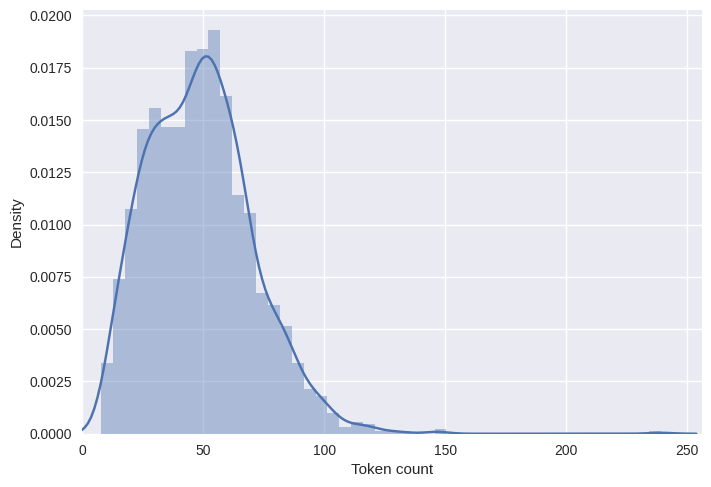

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [ ]:
device = torch.device("cuda")

In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)  # 2 labels: positive and negative
# The informational message below indicates that
# the model's output layer, including the logits, is randomly initialized.

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class SentimentClassifier(nn.Module):

    # Constructor class
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  Add a dropout layer
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
# Instantiate the model and move to classifier
class_names = ['negatif', 'netral', 'positif']  # Define the sentiment classes
model = SentimentClassifier(len(class_names))
model = model.to(device)

NameError: name 'MODEL_NAME' is not defined

In [ ]:
# Inspect model config
print(model)

SentimentClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(31923, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_featu

In [ ]:
# Inspect the maximum sequence length
tokenizer.model_max_length

1000000000000000019884624838656

In [ ]:
# Define a function to tokenize and encode the text and return both input_ids and attention_mask
def tokenize_and_encode(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_attention_mask=True,  # Return attention_mask
    )
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']
    return input_ids, attention_mask

tqdm.pandas()

# Apply the function to the "review" column
df_s[['input_ids', 'attention_mask']] = df_s['tweet'].progress_apply(lambda x: tokenize_and_encode(x)).apply(pd.Series)

# Convert sentiments to boolean values
df_s["sentiment_category"] = df_s["sentimen"].apply(lambda x: 2 if x == "positif" else (0 if x == "negatif" else 1))

df_s.head()

100%|██████████| 1815/1815 [00:02<00:00, 793.87it/s]


,sentimen,tweet,input_ids,attention_mask,sentiment_category
0,0,Kata @prabowo Indonesia tidak dihargai bangsa ...,"[3, 1951, 36, 12564, 1718, 1580, 13907, 2417, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1,1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","[3, 11085, 9708, 16, 5188, 23146, 27930, 6144,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
2,1,"Di era Jokowi, ekonomi Indonesia semakin baik....","[3, 1485, 4897, 27930, 16, 2498, 1718, 2718, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
3,2,"Bagi Sumatera Selatan, Asian Games berdampak p...","[3, 1896, 6863, 2273, 16, 12723, 11197, 9235, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
4,0,Negara kita ngutang buat bngun infrastruktur y...,"[3, 1806, 1732, 2870, 12590, 3815, 10044, 1772...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1


In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df_s, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
def get_tensor_data(data):
    out_input_ids = torch.tensor(data["input_ids"].tolist())
    out_attention_masks = torch.tensor(data["attention_mask"].tolist())
    out_labels = torch.tensor(data["sentiment_category"].tolist())
    return out_input_ids, out_attention_masks, out_labels

train_input_ids, train_attention_masks, train_labels = get_tensor_data(train_df)
val_input_ids, val_attention_masks, val_labels = get_tensor_data(val_df)
test_input_ids, test_attention_masks, test_labels = get_tensor_data(test_df)

In [ ]:
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Note: setting output_attentions and output_hidden_states to False can help with efficiency
# because it reduces the amount of additional information that the model needs to compute and
# store during forward passes.
model = BertForSequenceClassification.from_pretrained(model_name, num_labels = 3,
                                                      output_attentions = False,
                                                      output_hidden_states = False)

# weight_decay (float, optional) – weight decay coefficient (default: 1e-2)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn. # categorical classification

# Polarity

InSet (Indonesia Sentiment Lexicon)
This is a sentiment lexicon for Indonesia Language and it's construction refers to:

Fajri Koto, and Gemala Y. Rahmaningtyas "InSet Lexicon: Evaluation of a Word List for Indonesian Sentiment Analysis in Microblogs". IEEE in the 21st International Conference on Asian Language Processing (IALP), Singapore, December 2017.

The InSet Lexicon consists of 3,609 positive words and 6,609 negative words with weight ranging from -5 to +5

In [ ]:
import pandas as pd

# Load the positive and negative lexicons
lexicon_positive = pd.read_csv('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv', delimiter='\t', header=None, names=['word', 'score'])
lexicon_negative = pd.read_csv('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv', delimiter='\t', header=None, names=['word', 'score'])

# remove headers

lexicon_positive = lexicon_positive.iloc[1:]
lexicon_negative = lexicon_negative.iloc[1:]

# Ensure the scores are integers

lexicon_positive['score'] = lexicon_positive['score'].astype(int)
lexicon_negative['score'] = lexicon_negative['score'].astype(int)

# # Convert lexicons to dictionaries
lexicon_positive = dict(zip(lexicon_positive['word'], lexicon_positive['score']))
lexicon_negative = dict(zip(lexicon_negative['word'], lexicon_negative['score']))

In [ ]:
# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    words = text.split()
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

# Load your original dataframe
df_p = df_master.copy()

# Apply the sentiment analysis function
df_p['polarity_score'], df_p['predicted_sentiment'] = zip(*df_p['tweet'].apply(sentiment_analysis_lexicon_indonesia))

# Determine if the predicted sentiment matches the original sentiment
df_p['sentiment_match'] = df_p['sentimen'] == df_p['predicted_sentiment']

# Count the number of matches and mismatches
matches = df_p['sentiment_match'].sum()
mismatches = len(df_p) - matches

print(f'Matches: {matches}, Mismatches: {mismatches}')

# Show a few rows of the dataframe for verification
df.head()

match_counts = df_p.groupby(['sentimen', 'sentiment_match']).size().reset_index(name='counts')

Matches: 776, Mismatches: 1039


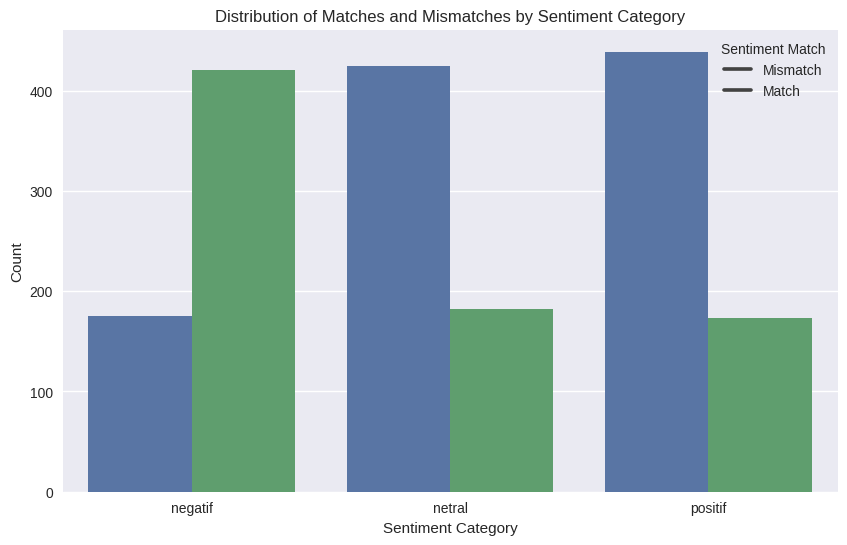

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=match_counts, x='sentimen', y='counts', hue='sentiment_match')
plt.title('Distribution of Matches and Mismatches by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Sentiment Match', loc='upper right', labels=['Mismatch', 'Match'])
plt.show()